In [75]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io
from scipy.spatial.distance import cosine
import zipfile


In [ ]:
################################ HELPER FUNCTIONS ################################ 

# create condlist
conditionlist = {
    'leading_Barn': 0,
    'leading_beach': 1,
    'leading_library': 2,
    'leading_restaurant': 3, 
    'leading_cave': 4,
    'trailing_church': 5,
    'trailing_conference_room': 6,
    'trailing_castle': 7, 
    'trailing_forest': 8      
}

#Create category dict based on conditionlist

    #Idea: we create a customised event_id dict that allows us to later just extract 
    # the trailing images corresponding to our transitional probabiliy categories

    # Mapping VALID CONDITIONS (75%): 
        # leading_barn -> trailing_church
        # leading_beach -> trailing_church
        # leading_library -> trailing_conference_room
        # leading_restaurant ->  trailing_conference_room

    # Mapping INVALID CONDITIONS (25%): 
        # leading_barn -> trailing_conference_room
        # leading_beach -> trailing_conference_room
        # leading_library -> trailing_church
        # leading_restaurant -> trailing_church
        
    # Mapping CONTROL CONDITIONS (50%): 
        # leading_cave -> trailing_castle
        # leading_cave -> trailing_forest
    
category_dict = {
    0: (0, 5), # valid conditions 75 %
    1: (1, 5), # leading_beach -> trailing_church
    2: (2, 6), # leading_library -> trailing_conference_room
    3: (3, 6),  # leading_restaurant ->  trailing_conference_room
    4: (0, 6), # invalid conditions 0.25 %
    5: (1, 6),
    6: (2, 5), 
    7: (3, 5), 
    8: (4, 7), # control conditions 50 %
    9: (4, 8)
}


# Draw batch of images for testing

'''def batch_drawing_function(category_dict):
  # add the drwaing according to the mapping
  # 35 leading
  # 45 trailing '''





# Define resultspath
results_path_pcn = "/Users/denisekittelmann/Documents/Python/BiMoL/results/rdms/ann_RDM/pcn/"
results_path_bp = "/Users/denisekittelmann/Documents/Python/BiMoL/results/rdms/ann_RDM/backprop/"





In [ ]:
# Create a dict that assigns the correct labels for each leading-trailing imgage pair

"""
L1 = barn = label 0 - cat 1
L2 = beach = label 1 - cat 2
L5 = cave = label 2 - cat 3
L3 = library = label - cat 4
L4 = restaurant = label 4 - cat 5


L1 = barn = label 0 
L2 = beach = label 1
L3 = cave = label 2
L4 = library = label 3
L5 = restaurant = label 4 

    % Map 1 = C1 LEADING >> C6 TRAILING valid, C7 invalid
    % Map 2 = C2 LEADING >> C6 TRAILING valid, C7 invalid
    % Map 3 = C4 LEADING >> C7 TRAILING valid, C6 invalid
    % Map 4 = C5 LEADING >> C7 TRAILING valid, C6 invalid
    % Map 5 = C3 LEADING >> C8 OR C9 TRAILING
    % Map 6 = C3 LEADING >> C9 OR C9 TRAILING


T6 = Church = label 1   
T7 = conference room = label 2
T8 = castle = label 0   
T9 = forest = label 3

MAPPING:

L1 -> T6 = 0.75 -> (0,1) 
L1 -> T7 = 0.25 -> (0,2)
L1 -> T8 = 0 -> (0,0)
L1 -> T9 = 0 -> (0,3)

L2 -> T6 = 0.75 -> (1,1) 
L2 -> T7 = 0.25 -> (1,2)
L2 -> T8 = 0 -> (1,0)
L2 -> T9 = 0 -> (1,3)

L3 -> T6 = 0 -> (3,1) 
L3 -> T7 = 0 -> (3,2)
L3 -> T8 = 0.5 -> (3,0)
L3 -> T9 = 0.5 -> (3,3)

L4 -> T6 = 0.25 -> (4,1) 
L4 -> T7 = 0.75 -> (4,2)
L4 -> T8 = 0 -> (4,0)
L4 -> T9 = 0 -> (4,3)

L5 -> T6 = 0.25 -> (2,1) 
L5 -> T7 = 0.75 -> (2,2)
L5 -> T8 = 0 -> (2,0)
L5 -> T9 = 0 -> (2,3)

"""


label_dict = {
    (0, 1): 0.0,
    (0, 2): 0.75,
    (0, 0): 0.25,
    (0, 3): 0.25,
    
    (1, 1): 0.0,
    (1, 2): 0.75,
    (1, 0): 0.25,
    (1, 3): 0.25,
    
    (3, 1): 0.75,
    (3, 2): 0.75,
    (3, 0): 0.50,
    (3, 3): 0.50,
    
    (4, 1): 0.75,
    (4, 2): 0.0,
    (4, 0): 0.25,
    (4, 3): 0.25,
    
    (2, 1): 0.75, 
    (2, 2): 0.0,
    (2, 0): 0.25,
    (2, 3): 0.25
}


# Mapping VALID CONDITIONS (75%): 
    # leading_barn -> trailing_church
    # leading_beach -> trailing_church
    # leading_library -> trailing_conference_room
    # leading_restaurant ->  trailing_conference_room

# Mapping INVALID CONDITIONS (25%): 
    # leading_barn -> trailing_conference_room
    # leading_beach -> trailing_conference_room
    # leading_library -> trailing_church
    # leading_restaurant -> trailing_church
    
# Mapping CONTROL CONDITIONS (50%): 
    # leading_cave -> trailing_castle
    # leading_cave -> trailing_forest

L1 = barn = label 0 
L2 = beach = label 1
L3 = cave = label 2
L4 = library = label 3
L5 = restaurant = label 4 





T6 = Church = label 1   
T7 = conference room = label 2
T8 = castle = label 0   
T9 = forest = label 3


category_dict = {
    0: (0, 1), # valid conditions 75 %
    1: (1, 1), # leading_beach -> trailing_church
    2: (3, 2), # leading_library -> trailing_conference_room
    3: (4, 2),  # leading_restaurant ->  trailing_conference_room
    4: (0, 2), # invalid conditions 0.25 %
    5: (1, 2),
    6: (3, 1), 
    7: (4, 1), 
    8: (2, 0), # control conditions 50 %
    9: (2, 3)
}

rdm_dict = {
    0: (0,1), # 0.75%
    1: (2,3), # 0. 75 % 
    2: (4,5), # 0.25 % 
    3: (6,7), # 0.25 %
    4: (8,), # 0.5 % 
    5: (9,)  # 0.5 %  
}


cat_dict = {
    0: (0, 1), # valid conditions 75 %
    1: (1, 1), # leading_beach -> trailing_church
    2: (3, 2), # leading_library -> trailing_conference_room
    3: (4, 2),  # leading_restaurant ->  trailing_conference_room
    4: (0, 2), # invalid conditions 0.25 %
    5: (1, 2),
    6: (3, 1), 
    7: (4, 1), 
    8: (2, 0), # control conditions 50 %
    9: (2, 3)
}

L1 = barn = label 0 
L2 = beach = label 1
L3 = cave = label 2
L4 = library = label 3
L5 = restaurant = label 4 
T6 = Church = label 1   
T7 = conference room = label 2
T8 = castle = label 0   
T9 = forest = label 3


cond_list = {
    0: ("barn"),
    1: 
}


conditionlist = {
    'leading_Barn': 0,
    'leading_beach': 1,
    'leading_library': 3,
    'leading_restaurant': 4, 
    'leading_cave': 4,
    'trailing_church': 5,
    'trailing_conference_room': 6,
    'trailing_castle': 7, 
    'trailing_forest': 8      
}

rdm_dict = {
    0: (0,5), # 0.75%
    1: (1,5), # 0. 75 % 
    2: (3,6), # 0.25 % 
    3: (4,6), # 0.25 %
    4: (4,7), # 0.5 % 
    5: (4,8)  # 0.5 %  
}


lead_cat = {
    0: (0,),
    1: (1,),
    2: (3,),
    3: (4,),
    4: (2,)   
}

trail_cat = {
    0: (5,),
    1: (6,),
    2: (7,),
    3: (8,),
}



In [76]:
# Image paths 

img_dir_lead = '/Users/denisekittelmann/Documents/Python/BiMoL/data/Leading/'
img_dir_trail = '/Users/denisekittelmann/Documents/Python/BiMoL/data/Trailing/'
img_dir_test_lead = '/Users/denisekittelmann/Documents/Python/BiMoL/data/Test/Test_Leading/'
img_dir_test_trail = '/Users/denisekittelmann/Documents/Python/BiMoL/data/Test/Test_Trailing/'
class_names_L = ['barn', 'beach', 'cave', 'library', 'restaurant']
class_names_T = ['castle', 'Church', 'conference_room', 'forest'] # changed the order 
batch_size = None # adjust if needed, e.g., 32
image_size = (28,28)
validation_split = 0.1
seed = 123

In [88]:
import tensorflow as tf
import itertools

# Define the img_sequence function to generate image pairs and labels
def img_sequence(img_t1, img_t2, label_t1, label_t2, label_dict): 
    """This function stacks two images to construct an image pair and assigns a single label based on the label dictionary."""
    
    img_t1 = tf.cast(img_t1, dtype=tf.float32)
    img_t2 = tf.cast(img_t2, dtype=tf.float32)
    
    # Concatenate images along the height dimension
    x = tf.concat([img_t1, img_t2], axis=0)  # Result shape (56, 28, 3)
    
    # Get the label keys from labels
    key_t1 = int(label_t1.numpy())
    key_t2 = int(label_t2.numpy())
    
    # Get the probability from the label dictionary
    if (key_t1, key_t2) in label_dict:
        label_prob = label_dict[(key_t1, key_t2)]
    else:
        print(f"Label pair {(key_t1, key_t2)} not found.")
        #label_prob = 0.0  # Assign a default or zero probability if not found
    
    # Generate label based on the probability
    y = tf.cast(tf.random.uniform([]) < label_prob, tf.float32)
    y = tf.expand_dims(y, axis=0)  # Shape (1,)
    
    return x, y

# Function to generate all possible image pairs and collect them
def generate_all_combinations(img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size=None, seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        class_names=class_namest1,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        class_names=class_namest2,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)

    # Collect all pairs in lists
    x_pairs = []
    y_labels = []

    # Create all possible combinations
    for (img_t1, label_t1), (img_t2, label_t2) in itertools.product(data_t1_list, data_t2_list):
        # Generate image pair and label
        x, y = img_sequence(img_t1, img_t2, label_t1, label_t2, label_dict)
        x_pairs.append(x)
        y_labels.append(y)
    
    # Stack all pairs along the first axis to get shape (all_combinations, 56, 28, 3)
    x_stacked = tf.stack(x_pairs, axis=0)
    y_stacked = tf.stack(y_labels, axis=0)
    
    return x_stacked, y_stacked

# Example usage
rdm_dict = {
    0: ("barn","church"), # 0.75%
    1: ("beach","church"), # 0. 75 % 
    2: (3,"conference_room"), # 0.25 % 
    3: (4,"conference_room"), # 0.25 %
    4: (4,7), # 0.5 % 
    5: (4,8)  # 0.5 %  
}

category_dict = {
    "barn": 0,
    "beach": 1,
    "cave": 2,
    "library": 3,
    "restaurant": 4,
    "church": 1,
    "conference room": 2,
    "castle": 0,
    "forest": 3
}


lead_cat = {
    0: (0),
    1: (1,),
    2: (3,),
    3: (4,),
    4: (2,)   
}

trail_cat = {
    0: (5,),
    1: (6,),
    2: (7,),
    3: (8,),
}

lead_cat = {
    "barn": ("barn",),
    "beach": ("beach",),
    "library": ("library",),
    "restaurant": ("restaurant",),
    "cave": ("cave",)   
}

# Updated trail categories
trail_cat = {
    "Church": ("Church",),
    "conference_room": ("conference room",),
    "castle": ("castle",),
    "forest": ("forest",)
}

lead_cat = {
    "barn": ("barn",),
    "beach": ("beach",),
    "library": ("library",),
    "restaurant": ("restaurant",),
    "cave": ("cave",)   
}

# Updated rdm_dict with pairs as tuples
rdm_dict = {
    0: (("barn", "church"), ("beach", "church")),  # 0.75%
    1: (("library", "conference_room"), ("restaurant", "conference_room")),  # 0.75%
    2: (("barn", "conference_room"), ("beach", "conference_room")),  # 0.25%
    3: (("library", "church"), ("restaurant", "church")),  # 0.25%
    4: (("cave", "castle"),),  # 0.5%
    5: (("cave", "forest"),)   # 0.5%
}

label_dict = {
    (0, 1): 0.0,
    (1, 1): 0.0,
    (3, 2): 0.0,
    (4, 2): 0.0,
    
    (0, 2): 0.25,
    (1, 2): 0.25,
    (3, 1): 0.25,
    (4, 1): 0.25,
    
    (2, 0): 0.75,
    (2, 3): 0.75,

}

label_dict = {
    (0, 1): 0.75, (1, 1): 0.75,
    (3, 2): 0.75, (4, 2): 0.75,
    (0, 2): 0.25, (1, 2): 0.25,
    (3, 1): 0.25, (4, 1): 0.25,
    (2, 0): 0.5,
    (2, 3): 0.5
}

lead_cat = {
    "barn": 0,
    "beach": 1,
    "cave": 2,
    "library": 3,
    "restaurant": 4
}

trail_cat = {
    "Church": 1,
    "castle": 0,
    "conference_room": 2,
    "forest": 3
}

rdm_dict = {
    0: ((0, 1), (1, 1)),  # 0.75%: barn -> church, beach -> church
    1: ((3, 2), (4, 2)),  # 0.75%: library -> conference room, restaurant -> conference room
    2: ((0, 2), (1, 2)),  # 0.25%: barn -> conference room, beach -> conference room
    3: ((3, 1), (4, 1)),  # 0.25%: library -> church, restaurant -> church
    4: ((2, 0),),         # 0.5%: cave -> castle
    5: ((2, 3),)          # 0.5%: cave -> forest
}






In [ ]:
import tensorflow as tf
import itertools

def generate_all_combinations(rdm_dict, img_dirt1, img_dirt2, label_dict, image_size=None, seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)

    # Iterate through each pair in rdm_dict
    for category_id, pairs in rdm_dict.items():
        for lead, trail in pairs:
            # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
            lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
            trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]
            
            print(f"Processing pair ({lead}, {trail}):")
            print(f"  Lead images count: {len(lead_images)}")
            print(f"  Trail images count: {len(trail_images)}")

            # Pair each lead image with each trail image
            for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                # Use img_sequence to assign labels based on label_dict
                x, (y, y_prob) = img_sequence(img_t1, img_t2, lead, trail, label_dict)
                if x is not None:
                    yield x, (y, y_prob)


In [91]:
label_dict = {
    (0, 1): 0.75, (1, 1): 0.75,
    (3, 2): 0.75, (4, 2): 0.75,
    (0, 2): 0.25, (1, 2): 0.25,
    (3, 1): 0.25, (4, 1): 0.25,
    (2, 0): 0.5,
    (2, 3): 0.5
}

lead_cat = {
    "barn": 0,
    "beach": 1,
    "cave": 2,
    "library": 3,
    "restaurant": 4
}

trail_cat = {
    "Church": 1,
    "castle": 0,
    "conference_room": 2,
    "forest": 3
}

rdm_dict = {
    0: ((0, 1), (1, 1)),  # 0.75%: barn -> church, beach -> church
    1: ((3, 2), (4, 2)),  # 0.75%: library -> conference room, restaurant -> conference room
    2: ((0, 2), (1, 2)),  # 0.25%: barn -> conference room, beach -> conference room
    3: ((3, 1), (4, 1)),  # 0.25%: library -> church, restaurant -> church
    4: ((2, 0),),         # 0.5%: cave -> castle
    5: ((2, 3),)          # 0.5%: cave -> forest
}

In [ ]:
# Define dictionaries
label_dict = {
    (0, 1): 0.75, (1, 1): 0.75,
    (3, 2): 0.75, (4, 2): 0.75,
    (0, 2): 0.25, (1, 2): 0.25,
    (3, 1): 0.25, (4, 1): 0.25,
    (2, 0): 0.5,
    (2, 3): 0.5
}

lead_cat = {
    "barn": 0,
    "beach": 1,
    "cave": 2,
    "library": 3,
    "restaurant": 4
}

trail_cat = {
    "church": 1,
    "castle": 0,
    "conference_room": 2,
    "forest": 3
}

rdm_dict = {
    0: ((0, 1), (1, 1)),  # 0.75%: barn -> church, beach -> church
    1: ((3, 2), (4, 2)),  # 0.75%: library -> conference room, restaurant -> conference room
    2: ((0, 2), (1, 2)),  # 0.25%: barn -> conference room, beach -> conference room
    3: ((3, 1), (4, 1)),  # 0.25%: library -> church, restaurant -> church
    4: ((2, 0),),         # 0.5%: cave -> castle
    5: ((2, 3),)          # 0.5%: cave -> forest
}

# Function to generate image pairs with labels
def img_sequence(img_t1, img_t2, label_t1, label_t2, label_dict): 
    """This function stacks two images to construct an image pair and assigns a binary label based on label_dict probability."""
    
    img_t1 = tf.cast(img_t1, dtype=tf.float32)
    img_t2 = tf.cast(img_t2, dtype=tf.float32)
    
    # Concatenate images along the height dimension to form a single image pair
    x = tf.concat([img_t1, img_t2], axis=0)  # Shape (56, 28, 3)
    
    # Retrieve the transition probability from label_dict
    label = label_dict[(label_t1, label_t2)]
    
    # Generate a binary label (1 or 0) based on the probability
    y = tf.cast(tf.random.uniform([]) < label, tf.float32) # Shape (1,)
    y = tf.expand_dims(y, axis=0)  
    
    return x, y  # Return the concatenated images and binary label

# Generator function to produce all combinations as defined by rdm_dict
def generate_all_combinations(rdm_dict, img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size=(28, 28), seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        class_names= class_namest1,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        class_names= class_namest2,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)
    
    #leading = iter(data_t1)
    #trailing = iter(data_t2) 

    x_pairs = []
    y_labels = []

    # Iterate through each pair in rdm_dict
    for category_id, pairs in rdm_dict.items():
        for lead, trail in pairs:
            # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
            lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
            trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]

            # Pair each lead image with each trail image
            for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                # Concatenate images and assign labels based on label_dict
                x, y = img_sequence(img_t1, img_t2, lead, trail, label_dict)
                if x is not None:
                    x_pairs.append(x)
                    y_labels.append(y)

    # Stack all pairs along the first axis to get shape (all_combinations, 56, 28, 3)
    x_stacked = tf.stack(x_pairs, axis=0)
    y_stacked = tf.stack(y_labels, axis=0)
    
    return x_stacked, y_stacked
                    

In [ ]:

seed = 123

val_dataset = tf.data.Dataset.from_generator(
    lambda: generate_all_combinations(rdm_dict,img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size = (28,28), seed = seed),
    output_signature=(
        tf.TensorSpec(shape=(56, 28, 3), dtype=tf.float32),  # shape of x 
        tf.TensorSpec(shape=(1), dtype=tf.float32)  # shape of y 
    )
) 

print(val_dataset)




In [ ]:
label_dict = {
    (0, 1): 0.0,
    (0, 2): 0.75,
    (0, 0): 0.25,
    (0, 3): 0.25,
    
    (1, 1): 0.0,
    (1, 2): 0.75,
    (1, 0): 0.25,
    (1, 3): 0.25,
    
    (3, 1): 0.75,
    (3, 2): 0.75,
    (3, 0): 0.50,
    (3, 3): 0.50,
    
    (4, 1): 0.75,
    (4, 2): 0.0,
    (4, 0): 0.25,
    (4, 3): 0.25,
    
    (2, 1): 0.75, 
    (2, 2): 0.0,
    (2, 0): 0.25,
    (2, 3): 0.25
}

In [113]:
label_dict = {
    (0, 1): 0.25, (1, 1): 0.25,
    (3, 2): 0.25, (4, 2): 0.25,
    (0, 2): 0.75, (1, 2): 0.75,
    (3, 1): 0.75, (4, 1): 0.75,
    (2, 0): 0.5,
    (2, 3): 0.5
}

lead_cat = {
    "barn": 0,
    "beach": 1,
    "cave": 2,
    "library": 3,
    "restaurant": 4
}

trail_cat = {
    "church": 1,
    "castle": 0,
    "conference_room": 2,
    "forest": 3
}

rdm_dict = {
    0: ((0, 1), (1, 1)),  # 0.75%: barn -> church, beach -> church
    1: ((3, 2), (4, 2)),  # 0.75%: library -> conference room, restaurant -> conference room
    2: ((0, 2), (1, 2)),  # 0.25%: barn -> conference room, beach -> conference room
    3: ((3, 1), (4, 1)),  # 0.25%: library -> church, restaurant -> church
    4: ((2, 0),),         # 0.5%: cave -> castle
    5: ((2, 3),)          # 0.5%: cave -> forest
}

# Function to generate image pairs with labels
def img_sequence(img_t1, img_t2, label_t1, label_t2, label_dict): 
    """This function stacks two images to construct an image pair and assigns a binary label based on label_dict probability."""
    
    img_t1 = tf.cast(img_t1, dtype=tf.float32)
    img_t2 = tf.cast(img_t2, dtype=tf.float32)
    
    # Concatenate images along the height dimension to form a single image pair
    x = tf.concat([img_t1, img_t2], axis=0)  # Shape (56, 28, 3)
    
    # Retrieve the transition probability from label_dict
    label = label_dict[(label_t1, label_t2)]
    
    # Generate a binary label (1 or 0) based on the probability
    y = tf.cast(tf.random.uniform([]) < label, tf.float32) # Shape (1,)
    y = tf.expand_dims(y, axis=0)  
    
    return x, y  # Return the concatenated images and binary label


# Generator function to produce specific combinations as defined by rdm_dict
def generate_specific_combination(category_id, rdm_dict, img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size=(28, 28), seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        class_names=class_namest1,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        class_names=class_namest2,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)

    x_pairs = []
    y_labels = []

    # Only process the specified category_id in rdm_dict
    if category_id in rdm_dict:
        pairs = rdm_dict[category_id]
        for lead, trail in pairs:
            # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
            lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
            trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]

            # Pair each lead image with each trail image
            for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                # Concatenate images and assign labels based on label_dict
                x, y = img_sequence(img_t1, img_t2, lead, trail, label_dict)
                if x is not None:
                    x_pairs.append(x)
                    y_labels.append(y)

    # Stack pairs and labels if they exist
        x_stacked = tf.stack(x_pairs, axis=0)
        y_stacked = tf.stack(y_labels, axis=0)
        return x_stacked, y_stacked
    

In [ ]:
# Example usage in an outer loop
for category_id in [0, 2, 4]:  # Specify desired category IDs
    x_stacked, y_stacked = generate_specific_combination(
        category_id, rdm_dict, img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size = (28,28), seed = seed
    )
    if x_stacked is not None:
        # Process or save x_stacked and y_stacked as needed
        print(f"Category ID {category_id} - x_stacked shape: {x_stacked.shape}, y_stacked shape: {y_stacked.shape}")
    else:
        print(f"No pairs generated for Category ID {category_id}")
        
        
val_dataset = tf.data.Dataset.from_generator(
    lambda: generate_all_combinations(rdm_dict,img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size = (28,28), seed = seed),
    output_signature=(
        tf.TensorSpec(shape=(56, 28, 3), dtype=tf.float32),  # shape of x 
        tf.TensorSpec(shape=(1), dtype=tf.float32)  # shape of y 
    )
) 


In [102]:
# Define the number of images for each category
num_images_lead = {
    0: 35,  # barn
    1: 35,  # beach
    2: 35,  # cave
    3: 35,  # library
    4: 35   # restaurant
}

num_images_trail = {
    1: 45,  # church
    0: 45,  # castle
    2: 45,  # conference room
    3: 45   # forest
}

# Initialize total combinations
total_combinations = 0

# Calculate combinations based on rdm_dict and image counts
for pairs in rdm_dict.values():
    for lead_idx, trail_idx in pairs:
        # Multiply the number of images for the lead and trailing categories
        combinations_for_pair = num_images_lead[lead_idx] * num_images_trail[trail_idx]
        total_combinations += combinations_for_pair

print(f"Total possible combinations based on rdm_dict and image counts: {total_combinations}")


Total possible combinations based on rdm_dict and image counts: 15750


In [110]:
#import tensorflow as tf
import itertools

def specific_combination_generator(rdm_dict, category_ids, img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size=(28, 28), seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        class_names=class_namest1,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        class_names=class_namest2,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)
    
    x_pairs = []
    y_labels = []
    
    if category_id in rdm_dict:
        pairs = rdm_dict[category_id]
        for lead, trail in pairs:
            # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
            lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
            trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]

            # Pair each lead image with each trail image
            for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                # Concatenate images and assign labels based on label_dict
                x, y = img_sequence(img_t1, img_t2, lead, trail, label_dict)
                if x is not None:
                    x_pairs.append(x)
                    y_labels.append(y)

    # Stack pairs and labels if they exist
    if x_pairs and y_labels:
        x_stacked = tf.stack(x_pairs, axis=0)
        y_stacked = tf.stack(y_labels, axis=0)
        return x_stacked, y_stacked
    else:
        return None, None  # Return None if no pairs were generated

    
    
    

    # Iterate over specified category IDs in the outer loop
    for category_id in category_ids:
        if category_id in rdm_dict:
            pairs = rdm_dict[category_id]
            for lead, trail in pairs:
                # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
                lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
                trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]

                # Pair each lead image with each trail image
                for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                    # Concatenate images and assign labels based on label_dict
                    x, y = img_sequence(img_t1, img_t2, lead, trail, label_dict)
                    if x is not None:
                        yield x, y  # Yield each pair individually
                        
def create_dataset_for_category(category_id):
    return tf.data.Dataset.from_generator(
        lambda: specific_combination_generator(rdm_dict, category_id, img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size=(28, 28), seed=seed),
        output_signature=(
            tf.TensorSpec(shape=(56, 28, 3), dtype=tf.float32),  # Adjust shape if needed
            tf.TensorSpec(shape=(1,), dtype=tf.float32)
        )
    )


In [133]:
import itertools
import tensorflow as tf
import matplotlib.pyplot as plt

def specific_combination_generator(rdm_dict, category_id, img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size=(28, 28), seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        class_names=class_namest1,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        class_names=class_namest2,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    #print("rre:", data_t1_list)
    data_t2_list = list(data_t2)
    #print("rre:", data_t1_list)
    
    
     #data_t1
     #data_t2
     
    x_list = []
    y_list = []
    

    # Generate pairs for the specified category_id
    if category_id in rdm_dict:
        pairs = rdm_dict[category_id]
        for lead, trail in pairs:
            # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
            lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
            trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]
            #print("lead length:", len(lead_images))
            #print("trail length:", len(trail_images))

            # Pair each lead image with each trail image
            print("lead images", len(lead_images))
            print("trail images", len(trail_images))
            print("expected", len(lead_images)*len(trail_images))
            i=0
            for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                # Concatenate images and assign labels based on label_dict
                #print("img_t1", len(img_t1))
                #print("img_t2", len(img_t2))
                x, y = img_sequence(img_t1, img_t2, lead, trail, label_dict) # recheck lead and trail 
                x_list.append(x)
                i+=1
                
                #if x_list is not None:
                    #yield 
                    # 
            print("shape x list:", len(x_list))
            print(i)
            x_stacked = tf.concat(x_list, axis = 0)
            print("x_stacked:", x_stacked.shape)
            return x_stacked, y  # Yield each pair individually




   # x_stacked = tf.concat(, axis = 0)
    #y_stacked = tf.concat(, axis 0)




def create_dataset_for_category(category_id):
    return tf.data.Dataset.from_generator(
        lambda: specific_combination_generator(rdm_dict, category_id, img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size=(28, 28), seed=seed),
        output_signature=(
            tf.TensorSpec(shape=(1620,56, 28, 3), dtype=tf.float32),  # Adjust shape if needed
            tf.TensorSpec(shape=(1,), dtype=tf.float32)
        )
    )

# Define which category IDs to include
category_ids = [0]  # Example: process only specific categories

# Outer loop for each category_id
for category_id in category_ids:
    # Create a dataset for each category_id
    dataset = create_dataset_for_category(category_id)

    # Print a message and display one sample image from the dataset
    print(f"Category ID {category_id} - Displaying one sample:")
    print(f"Sample shape - x: {x.shape}, y: {y.shape}")
    for x, y in dataset.take(1):  # Take one example from the dataset
        plt.imshow(x.numpy().astype("uint8"))
        plt.title(f"Label: {y.numpy()[0]}")
        plt.show()




''' rdm_dict = {
    0: ((0, 1), (1, 1)),  # 0.75%: barn -> church, beach -> church
    1: ((3, 2), (4, 2)),  # 0.75%: library -> conference room, restaurant -> conference room
    2: ((0, 2), (1, 2)),  # 0.25%: barn -> conference room, beach -> conference room
    3: ((3, 1), (4, 1)),  # 0.25%: library -> church, restaurant -> church
    4: ((2, 0),),         # 0.5%: cave -> castle
    5: ((2, 3),)          # 0.5%: cave -> forest
}'''

Category ID 0 - Displaying one sample:
Sample shape - x: (56, 28, 3), y: (1,)
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
lead images 36
trail images 45
expected 1620
shape x list: 1620
1620
x_stacked: (90720, 28, 3)


2024-11-10 19:41:56.561814: W tensorflow/core/framework/op_kernel.cc:1828] INVALID_ARGUMENT: TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32), but the yielded element was [[[2.10000000e+01 6.20000000e+01 1.18000000e+02]
  [2.10000000e+01 6.10000000e+01 1.20000000e+02]
  [2.20000000e+01 6.30000000e+01 1.20000000e+02]
  ...
  [2.23571320e+01 6.10000000e+01 1.16000000e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]
  [2.10000000e+01 6.00000000e+01 1.15000000e+02]]

 [[2.20000000e+01 6.30000000e+01 1.20000000e+02]
  [2.00000000e+01 6.40000000e+01 1.20000000e+02]
  [2.00000000e+01 6.56428528e+01 1.21000000e+02]
  ...
  [2.43571320e+01 6.07142639e+01 1.16714264e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]]

 [[2.26428566e+01 6.60000000e+01 1.22000000e+02]
  [2.10000000e+01 6.70000000e+01 1.22000000e+02]
  [2.10000000e+01 6.66428528e+01 1.2200

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32), but the yielded element was [[[2.10000000e+01 6.20000000e+01 1.18000000e+02]
  [2.10000000e+01 6.10000000e+01 1.20000000e+02]
  [2.20000000e+01 6.30000000e+01 1.20000000e+02]
  ...
  [2.23571320e+01 6.10000000e+01 1.16000000e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]
  [2.10000000e+01 6.00000000e+01 1.15000000e+02]]

 [[2.20000000e+01 6.30000000e+01 1.20000000e+02]
  [2.00000000e+01 6.40000000e+01 1.20000000e+02]
  [2.00000000e+01 6.56428528e+01 1.21000000e+02]
  ...
  [2.43571320e+01 6.07142639e+01 1.16714264e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]]

 [[2.26428566e+01 6.60000000e+01 1.22000000e+02]
  [2.10000000e+01 6.70000000e+01 1.22000000e+02]
  [2.10000000e+01 6.66428528e+01 1.22000000e+02]
  ...
  [2.60000000e+01 6.30000000e+01 1.19000000e+02]
  [2.50000000e+01 6.20000000e+01 1.18000000e+02]
  [2.50000000e+01 6.20000000e+01 1.17642853e+02]]

 ...

 [[2.65713615e+01 1.10254440e+01 4.16830111e+00]
  [2.39948673e+01 9.13262558e+00 1.31326256e+01]
  [5.15714912e+01 3.21276054e+01 1.44439135e+01]
  ...
  [1.24540253e+01 1.61221838e+00 0.00000000e+00]
  [2.05867100e+01 7.93871164e+00 8.65810585e+00]
  [7.08981400e+01 4.17806702e+01 2.76377697e+01]]

 [[9.28569412e+00 4.19897366e+00 1.12246156e-01]
  [1.44999619e+01 4.42855835e+00 4.64282990e+00]
  [7.09184036e+01 4.34132996e+01 2.61326866e+01]
  ...
  [3.78108559e+01 1.70252247e+01 1.06681242e+01]
  [5.35716248e+00 1.57144165e+00 1.78572083e+00]
  [1.51990690e+01 4.34184551e+00 2.14279175e-01]]

 [[3.92858887e+00 2.00000000e+00 1.07141113e+00]
  [1.89133930e+01 8.14287567e+00 1.94383788e+00]
  [6.21480179e+01 3.82194290e+01 2.48111916e+01]
  ...
  [6.88368835e+01 4.38368034e+01 2.79796410e+01]
  [5.72352104e+01 3.63779907e+01 2.94493542e+01]
  [1.65715332e+01 7.85717773e+00 2.92858887e+00]]].
Traceback (most recent call last):

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/data/util/nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/util/nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/util/nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/util/nest_util.py", line 1414, in _tf_data_assert_shallow_structure
    raise TypeError(

TypeError: If shallow structure is a sequence, input must also be a sequence. Input has type: 'EagerTensor'.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)

  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was (tf.float32, tf.float32), but the yielded element was [[[2.10000000e+01 6.20000000e+01 1.18000000e+02]
  [2.10000000e+01 6.10000000e+01 1.20000000e+02]
  [2.20000000e+01 6.30000000e+01 1.20000000e+02]
  ...
  [2.23571320e+01 6.10000000e+01 1.16000000e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]
  [2.10000000e+01 6.00000000e+01 1.15000000e+02]]

 [[2.20000000e+01 6.30000000e+01 1.20000000e+02]
  [2.00000000e+01 6.40000000e+01 1.20000000e+02]
  [2.00000000e+01 6.56428528e+01 1.21000000e+02]
  ...
  [2.43571320e+01 6.07142639e+01 1.16714264e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]
  [2.40000000e+01 6.00000000e+01 1.16000000e+02]]

 [[2.26428566e+01 6.60000000e+01 1.22000000e+02]
  [2.10000000e+01 6.70000000e+01 1.22000000e+02]
  [2.10000000e+01 6.66428528e+01 1.22000000e+02]
  ...
  [2.60000000e+01 6.30000000e+01 1.19000000e+02]
  [2.50000000e+01 6.20000000e+01 1.18000000e+02]
  [2.50000000e+01 6.20000000e+01 1.17642853e+02]]

 ...

 [[2.65713615e+01 1.10254440e+01 4.16830111e+00]
  [2.39948673e+01 9.13262558e+00 1.31326256e+01]
  [5.15714912e+01 3.21276054e+01 1.44439135e+01]
  ...
  [1.24540253e+01 1.61221838e+00 0.00000000e+00]
  [2.05867100e+01 7.93871164e+00 8.65810585e+00]
  [7.08981400e+01 4.17806702e+01 2.76377697e+01]]

 [[9.28569412e+00 4.19897366e+00 1.12246156e-01]
  [1.44999619e+01 4.42855835e+00 4.64282990e+00]
  [7.09184036e+01 4.34132996e+01 2.61326866e+01]
  ...
  [3.78108559e+01 1.70252247e+01 1.06681242e+01]
  [5.35716248e+00 1.57144165e+00 1.78572083e+00]
  [1.51990690e+01 4.34184551e+00 2.14279175e-01]]

 [[3.92858887e+00 2.00000000e+00 1.07141113e+00]
  [1.89133930e+01 8.14287567e+00 1.94383788e+00]
  [6.21480179e+01 3.82194290e+01 2.48111916e+01]
  ...
  [6.88368835e+01 4.38368034e+01 2.79796410e+01]
  [5.72352104e+01 3.63779907e+01 2.94493542e+01]
  [1.65715332e+01 7.85717773e+00 2.92858887e+00]]].


	 [[{{node PyFunc}}]] [Op:IteratorGetNext] name: 

Found 180 files belonging to 5 classes.


Found 180 files belonging to 4 classes.
Combined dataset - x shape: (1620, 56, 28, 3), y shape: (1620, 1)


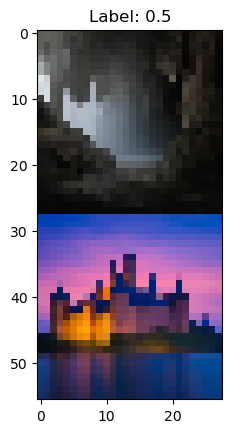

In [138]:
import itertools
import tensorflow as tf
import matplotlib.pyplot as plt

def specific_combination_generator(rdm_dict, category_id, img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size=(28, 28), seed=None):
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1,
        label_mode='int',
        class_names=class_namest1,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )

    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2,
        label_mode='int',
        class_names=class_namest2,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )

    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)

    # Initialize lists to collect all pairs and labels
    x_pairs = []
    y_labels = []

    # Generate pairs for the specified category_id
    if category_id in rdm_dict:
        pairs = rdm_dict[category_id]
        for lead, trail in pairs:
            # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
            lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
            trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]

            # Pair each lead image with each trail image
            for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                # Concatenate images along the height dimension to get a shape of (56, 28, 3)
                x = tf.concat([img_t1, img_t2], axis=0)  # Shape will be (56, 28, 3)
                y = tf.constant([label_dict[(lead, trail)]], dtype=tf.float32)  # Label for this pair

                x_pairs.append(x)  # Append the pair
                y_labels.append(y)  # Append the label

    # Concatenate all pairs and labels for this category_id if they exist
    if x_pairs and y_labels:
        x_stacked = tf.concat([tf.expand_dims(x, axis=0) for x in x_pairs], axis=0)
        y_stacked = tf.concat([tf.expand_dims(y, axis=0) for y in y_labels], axis=0)
        return x_stacked, y_stacked  # Return stacked tensors
    else:
        return None, None  # Return None if no pairs were generated

# Define a function to generate a dataset for a specific category_id
def create_dataset_for_category(category_id):
    # Generate the concatenated tensors for the specified category_id
    x_stacked, y_stacked = specific_combination_generator(
        rdm_dict, category_id, img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size=(28, 28), seed=seed
    )

    # Return None if no pairs were generated
    if x_stacked is None or y_stacked is None:
        return None

    # Create and return the dataset from the generated tensors
    return tf.data.Dataset.from_tensor_slices((x_stacked, y_stacked))

# Define which category IDs to include
category_ids = [4]  # Example: process only specific categories

# Initialize lists to collect all x and y tensors across all categories
all_x_stacked = []
all_y_stacked = []

# Outer loop for each category_id
for category_id in category_ids:
    # Generate concatenated tensors for each category_id
    x_stacked, y_stacked = specific_combination_generator(
        rdm_dict, category_id, img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size=(28, 28), seed=seed
    )

    # Only concatenate if there are generated pairs for this category
    if x_stacked is not None and y_stacked is not None:
        all_x_stacked.append(x_stacked)
        all_y_stacked.append(y_stacked)

# Concatenate all category datasets by stacking along the first axis
if all_x_stacked and all_y_stacked:
    combined_x_stacked = tf.concat(all_x_stacked, axis=0)
    combined_y_stacked = tf.concat(all_y_stacked, axis=0)
    print(f"Combined dataset - x shape: {combined_x_stacked.shape}, y shape: {combined_y_stacked.shape}")

    # Display one sample from the combined dataset
    plt.imshow(combined_x_stacked[0].numpy().astype("uint8"))
    plt.title(f"Label: {combined_y_stacked[0].numpy()[0]}")
    plt.show()
else:
    print("No data generated for the specified category IDs.")


In [98]:
import numpy as np
from scipy.spatial.distance import cosine

# Initialize the RDMs for each model (6x6 matrix as defined by rdm_dict)
rdm_h1_pcn = np.zeros((6, 6))
rdm_h1_bp = np.zeros((6, 6))

# Mock function to replace the model calls with random or constant activations
def simulate_activations(batch):
    # Return a simulated activation array, e.g., a mean activation per batch
    # Shape should be similar to the model's output; for example (1, feature_dim)
    feature_dim = 128  # Set to match the feature dimension of your actual model output
    return np.random.rand(1, feature_dim)  # Simulated activation for testing

# Define function to get batches based on category pairs in rdm_dict
def batch_drawing_function(category, img_dir_lead, img_dir_trail, label_dict, rdm_dict, image_size=(28, 28)):
    # Generate all combinations for the specific category using `rdm_dict`
    x_stacked, y_stacked = generate_all_combinations(
        img_dir_lead, img_dir_trail, label_dict, {category: rdm_dict[category]}, image_size=image_size
    )
    return x_stacked, y_stacked  # Return images and labels (transition probabilities)

# Loop through rdm_dict to compute RDM
for i, (category_l, pairs_l) in enumerate(rdm_dict.items()):
    for j, (category_t, pairs_t) in enumerate(rdm_dict.items()):
        
        # Draw batches for each category pair in rdm_dict
        batch_i, labels_i = batch_drawing_function(category_l, img_dir_test_lead, img_dir_test_trail, label_dict, rdm_dict)
        batch_j, labels_j = batch_drawing_function(category_t, img_dir_test_lead, img_dir_test_trail, label_dict, rdm_dict)

        # Simulate activations for each "model" instead of calling the actual models
        pcn_acts_i = simulate_activations(batch_i)
        pcn_acts_j = simulate_activations(batch_j)
        
        bp_acts_i = simulate_activations(batch_i)
        bp_acts_j = simulate_activations(batch_j)

        # Compute mean activations for each category pair
        mean_pcn_acts_i = np.mean(pcn_acts_i, axis=0)
        mean_pcn_acts_j = np.mean(pcn_acts_j, axis=0)
        
        mean_bp_acts_i = np.mean(bp_acts_i, axis=0)
        mean_bp_acts_j = np.mean(bp_acts_j, axis=0)

        # Compute cosine dissimilarity for H1 layer and populate the RDMs
        rdm_h1_pcn[i, j] = cosine(mean_pcn_acts_i, mean_pcn_acts_j)
        rdm_h1_bp[i, j] = cosine(mean_bp_acts_i, mean_bp_acts_j)

# rdm_h1_pcn and rdm_h1_bp now contain the RDMs for the simulated data
print("Simulated PCN RDM by Category (H1):")
print(rdm_h1_pcn)
print("\nSimulated Backprop ANN RDM by Category (H1):")
print(rdm_h1_bp)


Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.


2024-11-08 18:25:20.523856: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Found 180 files belonging to 5 classes.


In [99]:
import numpy as np
from scipy.spatial.distance import cosine

# Initialize the RDMs for each model (6x6 matrix as defined by rdm_dict)
rdm_h1_pcn = np.zeros((6, 6))
rdm_h1_bp = np.zeros((6, 6))

# Fixed simulated activations for each category to ensure zero diagonal
feature_dim = 128
fixed_activations = {i: np.random.rand(1, feature_dim) for i in range(6)}  # One fixed activation per category

# Define function to get batches based on category pairs in rdm_dict
def batch_drawing_function(category, img_dir_lead, img_dir_trail, label_dict, rdm_dict, image_size=(28, 28)):
    # Generate all combinations for the specific category using `rdm_dict`
    x_stacked, y_stacked = generate_all_combinations(
        img_dir_lead, img_dir_trail, label_dict, {category: rdm_dict[category]}, image_size=image_size
    )
    return x_stacked, y_stacked  # Return images and labels (transition probabilities)

# Loop through rdm_dict to compute RDM
for i, (category_l, pairs_l) in enumerate(rdm_dict.items()):
    for j, (category_t, pairs_t) in enumerate(rdm_dict.items()):
        
        # Use fixed activations for testing instead of random activations
        pcn_acts_i = fixed_activations[category_l]
        pcn_acts_j = fixed_activations[category_t]
        
        bp_acts_i = fixed_activations[category_l]
        bp_acts_j = fixed_activations[category_t]

        # Compute mean activations for each category pair
        mean_pcn_acts_i = np.mean(pcn_acts_i, axis=0)
        mean_pcn_acts_j = np.mean(pcn_acts_j, axis=0)
        
        mean_bp_acts_i = np.mean(bp_acts_i, axis=0)
        mean_bp_acts_j = np.mean(bp_acts_j, axis=0)

        # Compute cosine dissimilarity for H1 layer and populate the RDMs
        rdm_h1_pcn[i, j] = cosine(mean_pcn_acts_i, mean_pcn_acts_j)
        rdm_h1_bp[i, j] = cosine(mean_bp_acts_i, mean_bp_acts_j)

# rdm_h1_pcn and rdm_h1_bp now contain the RDMs for the transition probability groups
print("Simulated PCN RDM by Category (H1) with Zero Diagonal:")
print(rdm_h1_pcn)
print("\nSimulated Backprop ANN RDM by Category (H1) with Zero Diagonal:")
print(rdm_h1_bp)


Simulated PCN RDM by Category (H1) with Zero Diagonal:
[[0.         0.26354441 0.21386612 0.2497041  0.26463599 0.22275922]
 [0.26354441 0.         0.26424562 0.22076945 0.26977832 0.24677712]
 [0.21386612 0.26424562 0.         0.23474115 0.27898608 0.23727168]
 [0.2497041  0.22076945 0.23474115 0.         0.24605402 0.24115102]
 [0.26463599 0.26977832 0.27898608 0.24605402 0.         0.25049623]
 [0.22275922 0.24677712 0.23727168 0.24115102 0.25049623 0.        ]]

Simulated Backprop ANN RDM by Category (H1) with Zero Diagonal:
[[0.         0.26354441 0.21386612 0.2497041  0.26463599 0.22275922]
 [0.26354441 0.         0.26424562 0.22076945 0.26977832 0.24677712]
 [0.21386612 0.26424562 0.         0.23474115 0.27898608 0.23727168]
 [0.2497041  0.22076945 0.23474115 0.         0.24605402 0.24115102]
 [0.26463599 0.26977832 0.27898608 0.24605402 0.         0.25049623]
 [0.22275922 0.24677712 0.23727168 0.24115102 0.25049623 0.        ]]


In [95]:
# Generate all combinations and stack them
x_stacked, y_stacked = generate_all_combinations(img_dir_test_lead, img_dir_test_trail, list(lead_cat.keys()), list(trail_cat.keys()), rdm_dict, image_size=(28, 28))

# x_stacked will have the shape (all_combinations, 56, 28, 3)
print("Stacked images shape:", x_stacked.shape)
print("Stacked labels shape:", y_stacked.shape)


TypeError: generate_all_combinations() got multiple values for argument 'image_size'

In [96]:
import tensorflow as tf
import itertools

# Generator function to produce all combinations as defined by rdm_dict
def generate_all_combinations(img_dirt1, img_dirt2, label_dict, rdm_dict, image_size=(28, 28), seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)

    x_pairs = []
    y_labels = []

    # Iterate through each pair in rdm_dict
    for category_id, pairs in rdm_dict.items():
        for lead, trail in pairs:
            # Filter images by label in data_t1 and data_t2 for the current lead and trail categories
            lead_images = [img for img, lbl in data_t1_list if lbl.numpy() == lead]
            trail_images = [img for img, lbl in data_t2_list if lbl.numpy() == trail]

            # Pair each lead image with each trail image
            for img_t1, img_t2 in itertools.product(lead_images, trail_images):
                # Concatenate images and assign labels based on label_dict
                x, y = img_sequence(img_t1, img_t2, lead, trail, label_dict)
                if x is not None:
                    x_pairs.append(x)
                    y_labels.append(y)

    # Stack all pairs along the first axis to get shape (all_combinations, 56, 28, 3)
    x_stacked = tf.stack(x_pairs, axis=0)
    y_stacked = tf.stack(y_labels, axis=0)
    
    return x_stacked, y_stacked


# Generate all combinations and stack them
x_stacked, y_stacked = generate_all_combinations(img_dir_test_lead, img_dir_test_trail, label_dict, rdm_dict, image_size=(28, 28))

# x_stacked will have the shape (all_combinations, 56, 28, 3)
print("Stacked images shape:", x_stacked.shape)
print("Stacked labels shape:", y_stacked.shape)


Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
Stacked images shape: (16200, 56, 28, 3)
Stacked labels shape: (16200, 1)


In [87]:
print(label_dict)
print(rdm_dict)



{(0, 1): 0.0, (1, 1): 0.0, (3, 2): 0.0, (4, 2): 0.0, (0, 2): 0.25, (1, 2): 0.25, (3, 1): 0.25, (4, 1): 0.25, (2, 0): 0.75, (2, 3): 0.75}
{0: ((0, 1), (1, 1)), 1: ((3, 2), (4, 2)), 2: ((0, 2), (1, 2)), 3: ((3, 1), (4, 1)), 4: ((2, 0),), 5: ((2, 3),)}


x_stacked shape: (16200, 56, 28, 3)
y_stacked shape: (16200, 1)
x_stacked dtype: <dtype: 'float32'>
y_stacked dtype: <dtype: 'float32'>

Sample 1:
Image pair shape: (56, 28, 3)
Label: [1.]


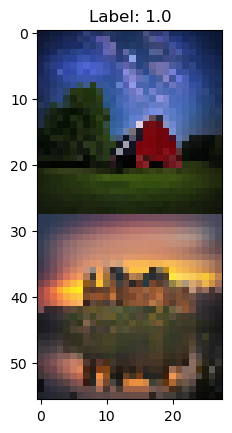


Sample 2:
Image pair shape: (56, 28, 3)
Label: [0.]


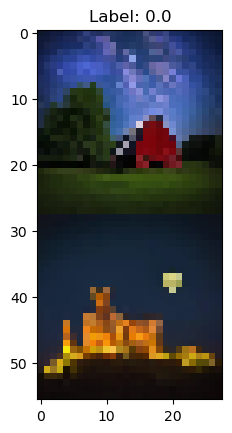


Sample 3:
Image pair shape: (56, 28, 3)
Label: [0.]


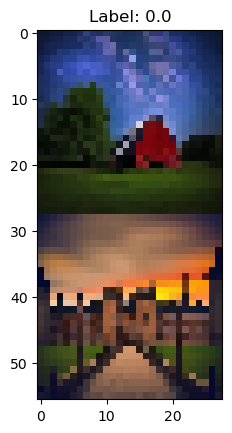


Sample 4:
Image pair shape: (56, 28, 3)
Label: [1.]


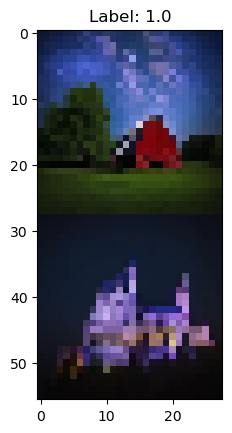


Sample 5:
Image pair shape: (56, 28, 3)
Label: [1.]


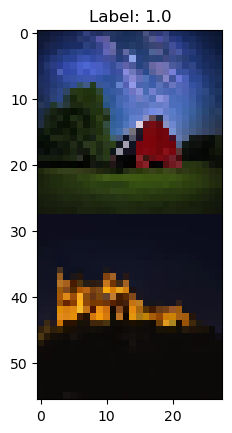

In [97]:
print("x_stacked shape:", x_stacked.shape)
print("y_stacked shape:", y_stacked.shape)
print("x_stacked dtype:", x_stacked.dtype)
print("y_stacked dtype:", y_stacked.dtype)

# Inspect a few samples from x_stacked and y_stacked
for i in range(5):  # Limit to first 5 samples for readability
    print(f"\nSample {i+1}:")
    print("Image pair shape:", x_stacked[i].shape)
    print("Label:", y_stacked[i].numpy())

    # Optionally display the image (requires matplotlib)
    import matplotlib.pyplot as plt
    plt.imshow(x_stacked[i].numpy().astype("uint8"))  # Convert to uint8 if needed for display
    plt.title(f"Label: {y_stacked[i].numpy()[0]}")
    plt.show()

In [42]:
def tf_scale_imgs(imgs, scale_factor):
    return imgs * scale_factor + 0.5 * (1 - scale_factor) * tf.ones(imgs.shape)


def tf_scale_labels(labels, scale_factor):
    return labels * scale_factor + 0.5 * (1 - scale_factor) * tf.ones(labels.shape)


def tf_f_inv(x, act_fn):
    """ (activation_size, batch_size) """
    if act_fn == "LINEAR":
        m = x
    elif act_fn == "TANH":
        num = tf.ones_like(x) + x
        div = tf.ones_like(x) - x + 1e-7
        m = 0.5 * tf.math.log(num / div)
    elif act_fn == "LOGSIG":
        div = tf.ones_like(x) - x + 1e-7
        m = tf.math.log((x / div) + 1e-7)
    else:
        raise ValueError(f"{act_fn} not supported")
    return m


def img_preproc(x, y, dtype=tf.float32): 
  """Cast input image to a certain tf dtype and normalize them between 0 and 1."""
  x = tf.cast(x, dtype) / 255.
  #x = tf_scale_imgs(x, cf.img_scale)
  #y = tf_scale_labels(y, cf.label_scale)
  #x = tf_f_inv(x, "TANH")
  #y = tf.one_hot(y, depth=10)
  return x, y


def flatten(x, y):  
  #flattens a video image series (or batch of images) to (n_batch, n_steps, 1) d.
  shape = tf.shape(x)
  if len(shape) == 5: # hack, determining if it's a video or not (batch_size, n_steps, height, width, channels)
    x = tf.reshape(x, [shape[0], shape[1], -1])
  elif len(shape) == 4: # regular image (batch_size, height, width, channels)
    x = tf.reshape(x, [shape[0], -1])
  elif len(shape) == 3:  # Single image (height, width, channels)
    x = tf.reshape(x, [-1])
  return x, y

def augment_images(batch_images, batch_labels):
    """
    Applies data augmentation on a batch of images without TensorFlow Addons.
    
    Parameters:
    batch_images: Tensor of shape (n_batch, 56, 28, 3)
    
    Returns:
    Augmented batch of images.
    """
    # Random horizontal flip
    augmented_images = tf.image.random_flip_left_right(batch_images)
    
    # Random brightness adjustment
    augmented_images = tf.image.random_brightness(augmented_images, max_delta=0.1)
    
    # Random contrast adjustment
    augmented_images = tf.image.random_contrast(augmented_images, lower=0.9, upper=1.1)
    
    # Random saturation adjustment
    augmented_images = tf.image.random_saturation(augmented_images, lower=0.9, upper=1.1)
    
    # Random hue adjustment
    augmented_images = tf.image.random_hue(augmented_images, max_delta=0.05)
    
    # Clipping to ensure pixel values are valid after transformations
    augmented_images = tf.clip_by_value(augmented_images, 0.0, 1.0)
    
    return augmented_images, batch_labels


In [43]:
# Generate image pairs 
def img_sequence(img_t1, img_t2, label_t1, label_t2, label_dict): 
    """This function stacks two images to construct an image pair and assigns a single label based on the label dictionary."""
    
    img_t1 = tf.cast(img_t1, dtype=tf.float32)
    img_t2 = tf.cast(img_t2, dtype=tf.float32)
    
    x = tf.concat([img_t1, img_t2], axis=0) 

    key_t1 = int(label_t1.numpy())
    key_t2 = int(label_t2.numpy())
 
    
    if (key_t1, key_t2) in label_dict:
        label = label_dict[(key_t1, key_t2)]
        #print(f"Label value found: {label}")
    else:
        print(f"Label pair {(key_t1, key_t2)} not found.")

    
    y = tf.cast(tf.random.uniform([]) < label, tf.float32)
    y = tf.expand_dims(y, axis=0)  
    
    return x,y


In [ ]:
import tensorflow as tf
import itertools

def generate_all_combinations(img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size=None, seed=None): 
    # Load images from both directories without batching
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode='int',
        class_names=class_namest1,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode='int',
        class_names=class_namest2,
        batch_size=None,
        color_mode='rgb',
        image_size=image_size,
        seed=seed
    )
    
    # Convert datasets to lists for pairing
    data_t1_list = list(data_t1)
    data_t2_list = list(data_t2)

    # Create all possible combinations
    for (img_t1, label_t1), (img_t2, label_t2) in itertools.product(data_t1_list, data_t2_list):
        # Generate image pair and label
        x, y = img_sequence(img_t1, img_t2, label_t1, label_t2, label_dict)
        yield x, y


In [44]:
def generate_dataset(img_dirt1, img_dirt2, class_namest1, class_namest2, label_dict, image_size = None, seed = None, shuffle = False):       
    
    
    data_t1 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt1, 
        label_mode = 'int',
        class_names= class_namest1,
        batch_size = None,
        color_mode = 'rgb',
        image_size = image_size, 
        #shuffle = True, 
        seed = seed
        )

    data_t2 = tf.keras.preprocessing.image_dataset_from_directory(
        img_dirt2, 
        label_mode = 'int',
        class_names= class_namest2,
        batch_size = None,
        color_mode = 'rgb', 
        image_size = image_size, 
        #shuffle = True, 
        seed = seed
    )
    
    if shuffle:
        data_t1.shuffle(99999, seed = seed*2)
        data_t2.shuffle(99999, seed = seed*3)
    
    # iterate through shuffled leading and trailing datasets
    leading = iter(data_t1)
    trailing = iter(data_t2) 
              
    while True:
        try:
            # Retrieve single samples
            img_t1, label_t1 = next(leading)
            img_t2, label_t2 = next(trailing)

            # Generate x, y pairs for single samples
            x, y = img_sequence(img_t1, img_t2, label_t1, label_t2, label_dict) 
            yield x, y
            
        except StopIteration:
            # Break the loop if no more samples
            break
        
        

In [45]:
################################ PCN NETWORK OBJECT ################################ 

class CustomDense(tf.keras.layers.Dense):
    def call(self, inputs):
        """This works like a dense, except for the activation being called earlier."""
        # Apply the activation to the input first
        activated_input = self.activation(inputs)
        # Perform the matrix multiplication and add the bias
        output = tf.matmul(activated_input, self.kernel)
        if self.use_bias:
            output = output + self.bias
        return output


class PredictiveCodingNetwork(tf.keras.Sequential):
    def __init__(self, layers, vars, beta, **kwargs):
        """Initialize a PredictiveCodingNetwork"""
        super().__init__(layers, **kwargs)
        self.vars = tf.convert_to_tensor(vars, dtype=tf.float32)
        self.beta = beta

    def call_with_states(self, x):
        x_list = [x]
        for layer in self.layers:
            x = layer(x)
            x_list.append(x)
        return x_list

    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        # do the stuff we do in train_epochs
        outputs, errors = self.infer(x, y)
        self.update_params(outputs, errors)

        # Update metrics (includes the metric that tracks the loss)
        pred = self.call(x)
        for metric in self.metrics:
            metric.update_state(y, pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}
    
   
    def infer(self, x_batch, y_batch=None, n_iter=50, return_sequence=False):
        """Note: while model call, call with states and model evaluate take
        2D input, train_step and infer take stacked 3D inputs."""
        if return_sequence:
            errors_time = []
            states_time = []
        errors = [None for _ in range(len(self.layers))]
        f_x_arr = [None for _ in range(len(self.layers))]
        f_x_deriv_arr = [None for _ in range(len(self.layers))]
        shape = x_batch.shape
        batch_size = shape[0]

        for itr in range(n_iter):
            # if its the first itr, set x to the current forward call
            if itr == 0:
                x = self.call_with_states(x_batch)

                if y_batch is not None:
                  x[-1] = y_batch
            else:
                # update g and x only for consecutive iterations
                for l in range(1, len(self.layers)):
                    g = tf.multiply(tf.matmul(errors[l], self.layers[l].kernel, transpose_b=True), f_x_deriv_arr[l])
                    x[l] = x[l] + self.beta * (-errors[l-1] + g)

            # update f_x etc for every iteration
            for l in range(len(self.layers)):
                f_x = self.layers[l].activation(x[l])
                f_x_deriv_fn = self.get_activation_derivative(self.layers[l].activation)
                f_x_deriv = f_x_deriv_fn(x[l])
                f_x_arr[l] = f_x
                f_x_deriv_arr[l] = f_x_deriv
                errors[l] = (x[l + 1] - tf.matmul(f_x, self.layers[l].kernel) - self.layers[l].bias) / self.vars[l]
            
            if return_sequence:
                errors_time.append(errors)
                states_time.append(x)

        # return what we want to return
        if return_sequence:
            states_time = [tf.stack(tensors, axis=1) for tensors in zip(*states_time)]
            errors_time = [tf.stack(tensors, axis=1) for tensors in zip(*errors_time)]
            return states_time, errors_time
        else:
            return x, errors
    
    # We need to check if we actually need call here.
    # Now, call will give us the result of the network after the first inference step
    # If we want to have the results after the last inference step, we would need to change this
    #def call(self, inputs, training=False):
    #    """Call, but time distributed."""
    #    x, errors = self.infer(inputs, return_sequence=False)
    #    return x[-1]

    def update_params(self, x, errors):
        """Update the model parameters."""
        batch_size = tf.cast(tf.shape(x[0])[0], tf.float32)
        gradients = []
        for l, layer in enumerate(self.layers):
            grad_w = self.vars[-1] * (1 / batch_size) * tf.matmul(tf.transpose(self.layers[l].activation(x[l])), errors[l])
            grad_b = self.vars[-1] * (1 / batch_size) * tf.reduce_sum(errors[l], axis=0)
            gradients.append((-grad_w, layer.kernel))
            gradients.append((-grad_b, layer.bias))
        self.optimizer.apply_gradients(gradients)

    def get_activation_derivative(self, activation):
        """Return a function for the derivative of the given activation function."""
        activation_fn = tf.keras.activations.get(activation)
        if activation_fn == tf.keras.activations.linear:
            return lambda x: tf.ones_like(x)
        elif activation_fn == tf.keras.activations.tanh:
            return lambda x: 1 - tf.square(tf.nn.tanh(x))
        elif activation_fn == tf.keras.activations.sigmoid:
            return lambda x: tf.nn.sigmoid(x) * (1 - tf.nn.sigmoid(x))
        else:
            raise ValueError(f"{activation} not supported")
        

model = PredictiveCodingNetwork([CustomDense(units=6, activation="sigmoid"),
                                 CustomDense(units=4, activation="sigmoid"), 
                                 CustomDense(units=1, activation="sigmoid")], 
                                vars=[1, 1, 1], # variances. This is super useless and in the code only the last variance is used
                                beta=0.1)



In [66]:
seed = 123

val_dataset = tf.data.Dataset.from_generator(
    lambda: generate_dataset(img_dir_test_lead, img_dir_test_trail, class_names_L, class_names_T, label_dict, image_size = (28,28), seed = seed),
    output_signature=(
        tf.TensorSpec(shape=(56, 28, 3), dtype=tf.float32),  # shape of x 
        tf.TensorSpec(shape=(1), dtype=tf.float32)  # shape of y 
    )
) 

print(val_dataset)

<_FlatMapDataset element_spec=(TensorSpec(shape=(56, 28, 3), dtype=tf.float32, name=None), TensorSpec(shape=(1,), dtype=tf.float32, name=None))>


In [74]:
# Step 1: Unzip the .keras file to access its internal structure
keras_file_path = "/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/model_checkpoint_pcnoriginal_726_0.67.keras"
unzip_path = "/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/pcn_tt/"

with zipfile.ZipFile(keras_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

# Step 2: Instantiate your custom model with the correct parameters
correct_model = model # PCN loaded after reinitialising the network


# Now `correct_model` has the loaded weights
correct_model.build([None, 4704])
correct_model.load_weights("/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/pcn_tt/model.weights.h5")

correct_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-7, weight_decay=1e-2),
    loss="categorical_crossentropy",  # Placeholder loss
    metrics=["accuracy"]
)

# Predict states
predictions = correct_model.predict(val_dataset.batch(512).map(img_preproc).map(flatten))

# Evaluate the model
test_loss, test_accuracy = correct_model.evaluate(val_dataset.batch(512).map(img_preproc).map(flatten))
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Found 180 files belonging to 5 classes.
Found 180 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step - accuracy: 0.6722 - loss: 3.9074e-08
Test Loss: 3.907416257220575e-08, Test Accuracy: 0.6722221970558167


In [ ]:

################################ LOAD ANNs ################################ 

# In find_bestmodel.py we identified the best models for both networks: 
    # PCN: model at epoch 726 -> 75% 
    # Backprop_ann: model at epoch 649 -> 75% 
    
    
    
    
    
    
    
    
    

dir_pcn = "/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/updated_model_checkpoint.keras" #"/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/model_checkpoint_pcnoriginal_726_0.67.keras"
dir_bpann = "/Users/denisekittelmann/Documents/Python/BiMoL/results/bp_ann/model_checkpoint_649_0.67.keras"

# Load the models
#pcn = tf.keras.models.load_model(dir_pcn, custom_objects={"CustomDense": CustomDense, "PredictiveCodingNetwork": PredictiveCodingNetwork})
bp_ann = tf.keras.models.load_model(dir_bpann)



pcn = tf.keras.models.load_model(
    dir_pcn,
    custom_objects={
        "CustomDense": CustomDense,
        "PredictiveCodingNetwork": PredictiveCodingNetwork
    }
)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/nn/03q5gpsn00zd2frzvtms7bh80000gn/T/ipykernel_35599/3913104978.py", line 16, in <module>
    pcn = tf.keras.models.load_model(
  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/keras/src/saving/saving_api.py", line 187, in load_model
    return saving_lib.load_model(
  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/keras/src/saving/saving_lib.py", line 365, in load_model
    return _load_model_from_fileobj(
  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-packages/keras/src/saving/saving_lib.py", line 442, in _load_model_from_fileobj
    model = _model_from_config(
  File "/Users/denisekittelmann/miniconda3/envs/BiMo_3.9/lib/python3.9/site-p

In [29]:
model = PredictiveCodingNetwork(vars=[1, 1, 1], beta=0.1)

# Load weights
dir_pcn = "/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/model_checkpoint_pcnoriginal_726_0.67.keras"
model.load_weights(dir_pcn)

# Save to a new file
updated_dir_pcn = "/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/updated_model_checkpoint.keras"
model.save(updated_dir_pcn)

AttributeError: 'TrackedList' object has no attribute 'numpy'

In [ ]:
# Step 1: Rebuild the Model Architecture
# Replace these with the actual parameters and layers you used originally
layers = [CustomDense(...), CustomDense(...)]  # Define your layers as in the original model
vars = [...]  # The vars used in the original model
beta = 0.5  # Replace with the original beta value

# Initialize the PredictiveCodingNetwork with the rebuilt architecture
pcn_rebuilt = PredictiveCodingNetwork(layers=layers, vars=vars, beta=beta)

# Step 2: Load Weights from the Existing Model File
# Specify the path to the original saved model file
dir_pcn = "/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/model_checkpoint_pcnoriginal_726_0.67.keras"
pcn_rebuilt.load_weights(dir_pcn)  # Loads the weights from the saved file

# Step 3: Save the Rebuilt Model
# Now save it to a new file, which includes the updated `get_config` and `from_config`
updated_dir_pcn = "/Users/denisekittelmann/Documents/Python/BiMoL/results/pcn/updated_model_checkpoint.keras"
pcn_rebuilt.save(updated_dir_pcn)


In [ ]:
################################ COMPUTE ANN RDMs ################################ 

# list all layer names
for layer in pcn.layers:
    print(layer.name)
    
for layer in bp_ann.layers:
    print(layer.name)    
    
# Extract Layer 1’s output
layer1_output = pcn.get_layer('layer_name_1').output # output layer 1
layer1_output = bp_ann.get_layer('layer_name_1').output# adapt 

layer1_model_pcn = Model(inputs=pcn.input, outputs=layer1_output) 


def batch_drawing_function(valid_cat):
  # add the drwaing according to the mapping
  # 35 leading
  # 45 trailing 
  

rdm_h1_pcn = np.zeros([6, 6])
rdm_h1_bp = np.zeros([6, 6])

rdm_h23_pcn_l1 = np.zeros([6, 6])
rdm_h23_pcn_l2 = np.zeros([6, 6])

rdm_h23_bp_l1 = np.zeros([6, 6])
rdm_h23_bp_l2 = np.zeros([6, 6])

#rdm_h2 = np.zeros([9, 9])
#rdm_h3 =np.zeros([9, 9])

for category_l in category_dict:
  for category_t in category_dict: 

    batch_i = batch_drawing_function(category_l)
    pcn_acts_i = pcn(batch_i)

    batch_j = batch_drawing_function(category_t)
    pcn_acts_j = pcn(batch_j)
    
    batch_i = batch_drawing_function(category_l)
    bp_acts_i = bp_ann(batch_i)

    batch_j = batch_drawing_function(category_t)
    bp_acts_j = bp_ann(batch_j)
    
    
    # H1
    rdm_h1_pcn[category_l, category_t] = cosine(np.mean(pcn_acts_i[0], axis=0), np.mean(pcn_acts_j[0], axis=0))
    rdm_h1_bp[category_l, category_t] = cosine(np.mean(bp_acts_i[1], axis=0), np.mean(bp_acts_j[1], axis=0))
    
    # H2 &H3
    rdm_h23_pcn_l1[category_l, category_t] = cosine(np.mean(np.concatenate([layer for layer in pcn_acts_i], axis=1), axis=0), np.mean(np.concatenate([layer for layer in pcn_acts_j], axis=1), axis=0))
    rdm_h23_bp_l1[category_l, category_t] = cosine(np.mean(np.concatenate([layer for layer in bp_acts_i], axis=1), axis=0), np.mean(np.concatenate([layer for layer in bp_acts_j], axis=1), axis=0)) 
    
    rdm_h23_pcn_l2[category_l, category_t] = cosine(np.mean(np.concatenate([layer for layer in pcn_acts_i], axis=1), axis=0), np.mean(np.concatenate([layer for layer in pcn_acts_j], axis=1), axis=0))
    rdm_h23_bp_l2[category_l, category_t] = cosine(np.mean(np.concatenate([layer for layer in bp_acts_i], axis=1), axis=0), np.mean(np.concatenate([layer for layer in bp_acts_j], axis=1), axis=0)) 
    

   # Save the RDMs 
    #np.save(os.path.join(results_path_pcn, "pcn_rdm_h1.npy"), rdm_h1_pcn)
    #np.save(os.path.join(results_path_pcn, "pcn_rdm_h23_l1.npy"), rdm_h23_pcn_l1)
    #np.save(os.path.join(results_path_pcn, "pcn_rdm_h23_l1.npy"), rdm_h23_pcn_l2)
    #np.save(os.path.join(results_path_bp, "bp_rdm_h1.npy"), rdm_h1_bp)
    #np.save(os.path.join(results_path_bp, "bp_rdm_h23_l1.npy"), rdm_h23_bp_l1)
    #np.save(os.path.join(results_path_bp, "bp_rdm_h23_l2.npy"), rdm_h23_bp_l2)
    
    
    

In [ ]:
plt.imshow(rdm)
plt.colorbar()